In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import zscore

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("salary.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [4]:
data["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [5]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
for col in data.columns:
    data[col]=pd.factorize(data[col])[0]

In [7]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0
2,2,1,2,2,2,1,2,1,1,0,0,0,0,0,1
3,3,0,3,3,3,1,0,1,0,0,1,0,0,0,1
4,4,2,4,3,3,0,3,0,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,43,0,28522,2,2,1,9,4,1,1,0,0,17,0,0
48838,18,0,1266,1,1,1,0,1,1,0,0,0,0,0,1
48839,13,0,26842,1,1,2,7,3,1,1,0,0,0,0,0
48840,21,0,4589,1,1,0,7,0,1,0,0,0,9,0,0


age                    AxesSubplot(0.125,0.71587;0.168478x0.16413)
workclass           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
fnlwgt              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
education           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
educational-num       AxesSubplot(0.125,0.518913;0.168478x0.16413)
marital-status     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
occupation         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
relationship       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
race                  AxesSubplot(0.125,0.321957;0.168478x0.16413)
gender             AxesSubplot(0.327174,0.321957;0.168478x0.16413)
capital-gain       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
capital-loss       AxesSubplot(0.731522,0.321957;0.168478x0.16413)
hours-per-week           AxesSubplot(0.125,0.125;0.168478x0.16413)
native-country        AxesSubplot(0.327174,0.125;0.168478x0.16413)
income                AxesSubplot(0.529348,0.125;0.168478x0.16

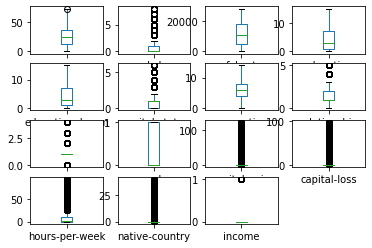

In [23]:
data.plot(kind="box",subplots=True,layout=(4,4))

In [9]:
data.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,24.828611,0.948978,11865.867696,4.093403,4.093403,1.121903,6.412391,1.578785,0.980672,0.331518,2.075140,1.020618,8.070697,1.259695,0.239282
std,15.741909,1.694453,8048.909588,3.439515,3.439515,1.181543,3.290933,1.191836,0.496497,0.470764,10.402283,6.309789,13.335847,5.048164,0.426649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,4830.250000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,0.000000,10713.500000,3.000000,3.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,36.000000,1.000000,18305.750000,7.000000,7.000000,1.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000
max,73.000000,8.000000,28522.000000,15.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,122.000000,98.000000,95.000000,41.000000,1.000000


In [10]:
data.info

<bound method DataFrame.info of        age  workclass  fnlwgt  education  educational-num  marital-status  \
0        0          0       0          0                0               0   
1        1          0       1          1                1               1   
2        2          1       2          2                2               1   
3        3          0       3          3                3               1   
4        4          2       4          3                3               0   
...    ...        ...     ...        ...              ...             ...   
48837   43          0   28522          2                2               1   
48838   18          0    1266          1                1               1   
48839   13          0   26842          1                1               2   
48840   21          0    4589          1                1               0   
48841   29          6    9249          1                1               1   

       occupation  relationship  race  gend

In [11]:
z=np.abs(zscore(data))
np.where(z>3)

(array([   54,    74,    94, ..., 48832, 48834, 48834], dtype=int64),
 array([ 5,  8,  8, ...,  8, 12, 13], dtype=int64))

In [12]:
df=data[(z<3).all(axis=1)]
df.shape

(42960, 15)

In [13]:
data.shape

(48842, 15)

In [14]:
df.skew()

age                0.243581
workclass          1.723743
fnlwgt             0.365449
education          0.894839
educational-num    0.894839
marital-status     1.096984
occupation        -0.004264
relationship       0.939033
race              -1.221106
gender             0.741070
capital-gain       6.447717
capital-loss       7.270396
hours-per-week     1.731871
native-country     5.766037
income             1.200283
dtype: float64

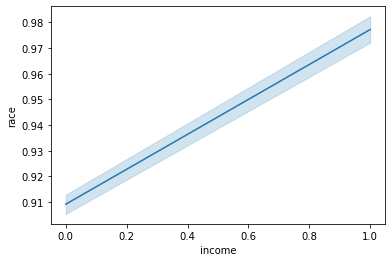

In [15]:
sns.lineplot(x="income",y="race",data=df)
        

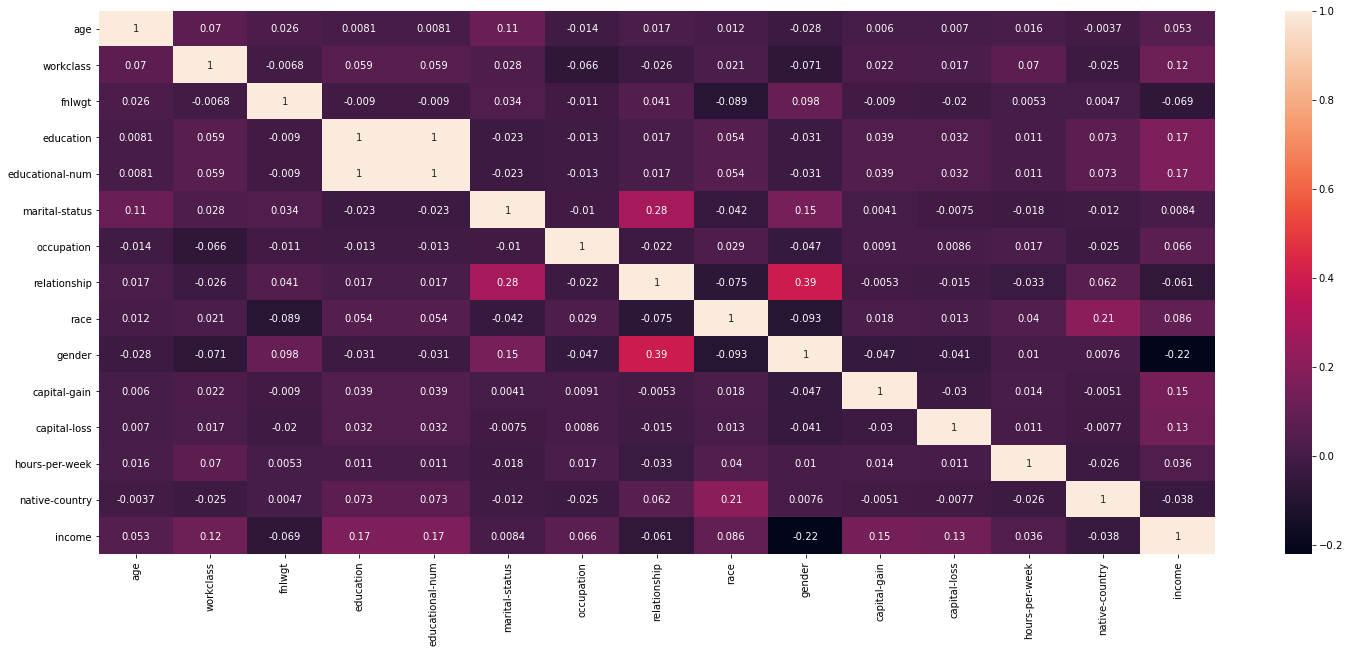

In [16]:
plt.figure(figsize=(25,10)) 
sns.heatmap(df.corr(),annot=True)

In [17]:
x=df.iloc[:,0:-1]
x.shape

(42960, 14)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [19]:
y=df.iloc[:,-1]
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 42960, dtype: int64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=41)

model=[SVC(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    print("-------------------->",m,"<---------------------")
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("AC:",accuracy_score(y_test,predm))
    print("score:",m.score(x_train,y_train))
    
    print("CA:",confusion_matrix(y_test,predm))
    print("CR:",classification_report(y_test,predm))
    print("AUC:",roc_auc_score(y_test,m.predict(x_test)))
    print("\n")
    

--------------------> SVC() <---------------------
AC: 0.8415038442547789
score: 0.8455338220477365
CA: [[10194   551]
 [ 1696  1736]]
CR:               precision    recall  f1-score   support

           0       0.86      0.95      0.90     10745
           1       0.76      0.51      0.61      3432

    accuracy                           0.84     14177
   macro avg       0.81      0.73      0.75     14177
weighted avg       0.83      0.84      0.83     14177

AUC: 0.7272739204335296


--------------------> GaussianNB() <---------------------
AC: 0.7946674190590393
score: 0.7929680714310531
CA: [[9516 1229]
 [1682 1750]]
CR:               precision    recall  f1-score   support

           0       0.85      0.89      0.87     10745
           1       0.59      0.51      0.55      3432

    accuracy                           0.79     14177
   macro avg       0.72      0.70      0.71     14177
weighted avg       0.79      0.79      0.79     14177

AUC: 0.6977639895392339


-------------

In [21]:

for m in model:
    print("-----------------",m)
    scr=cross_val_score(m,x,y,cv=10)
    print(scr.mean())
    

----------------- SVC()
0.8403398510242086
----------------- GaussianNB()
0.7938314711359404
----------------- LogisticRegression()
0.7648975791433892
----------------- DecisionTreeClassifier()
0.8024208566108009
----------------- KNeighborsClassifier()
0.8157122905027933
